# Data Cleaning

#### Find columns with missing values

In [1]:
import pandas as pd
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
print(marks.isnull().sum())

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64


In [2]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')

df = df[df.isnull().sum(axis=1) != 5]
print(df.isnull().sum())

Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64


#### Question
The given data frame 'customer' has a column 'Cust_id' which has values Cust_1, Cust_2 and so on.
Remove the repeated 'Cust_' from the column Cust_id so that the output column Cust_id have just numbers like 1, 2, 3 and so on.
Print the first 10 rows of the dataset  'customer' after processing.

In [2]:
import pandas as pd
customer = pd.read_csv('https://query.data.world/s/y9rxL9mGdP6AXPiDaIL4yYm6DsfTV2')
#customer['Cust_id'].head(10)
customer['Cust_id'] = customer['Cust_id'].apply(lambda x: x.replace('Cust_','')) #Type your code here
print(customer.head(10))

        Customer_Name Province   Region Customer_Segment Cust_id
0  MUHAMMED MACINTYRE  NUNAVUT  NUNAVUT   SMALL BUSINESS       1
1        BARRY FRENCH  NUNAVUT  NUNAVUT         CONSUMER       2
2       CLAY ROZENDAL  NUNAVUT  NUNAVUT        CORPORATE       3
3      CARLOS SOLTERO  NUNAVUT  NUNAVUT         CONSUMER       4
4        CARL JACKSON  NUNAVUT  NUNAVUT        CORPORATE       5
5      MONICA FEDERLE  NUNAVUT  NUNAVUT        CORPORATE       6
6     DOROTHY BADDERS  NUNAVUT  NUNAVUT      HOME OFFICE       7
7     NEOLA SCHNEIDER  NUNAVUT  NUNAVUT      HOME OFFICE       8
8         CARLOS DALY  NUNAVUT  NUNAVUT      HOME OFFICE       9
9       CLAUDIA MINER  NUNAVUT  NUNAVUT   SMALL BUSINESS      10


#### Rounding decimal places of a column
Description
The given dataframe 'sleepstudy' has a column 'Reaction' with floating integer values up to 4 decimal places. Round off the decimal places to 1

In [4]:
!pip install pydataset

     |████████████████████████████████| 15.9 MB 778 kB/s eta 0:00:01
Using legacy 'setup.py install' for pydataset, since package 'wheel' is not installed.
    Running setup.py install for pydataset ... done


In [10]:
from pydataset import data
sleepstudy =data('sleepstudy')
#sleepstudy['Reaction'] = sleepstudy.apply(lambda x:round(x,1))#Type your code here
sleepstudy['Reaction']=round(sleepstudy['Reaction'],1)
print(sleepstudy.head(10))

    Reaction  Days  Subject
1      249.6     0      308
2      258.7     1      308
3      250.8     2      308
4      321.4     3      308
5      356.9     4      308
6      414.7     5      308
7      382.2     6      308
8      290.1     7      308
9      430.6     8      308
10     466.4     9      308


#### Remove Duplicate Data

In [16]:
import pandas as pd
rating = pd.read_csv('https://query.data.world/s/EX0EpmqwfA2UYGz1Xtd_zi4R0dQpog')
print(rating.shape)
rating_update = rating.drop_duplicates()
print(rating_update.shape)

(1254, 5)
(1149, 5)


# Univariate Analysis

## Unordered Categorical Variables ( Unordered Dimensions)

Ex: City, Country etc 

### Power Law Equation

Linear Line in log-log scale is represented by 
Y=aX^b
is similar to linear scale equation
Y= bX+c


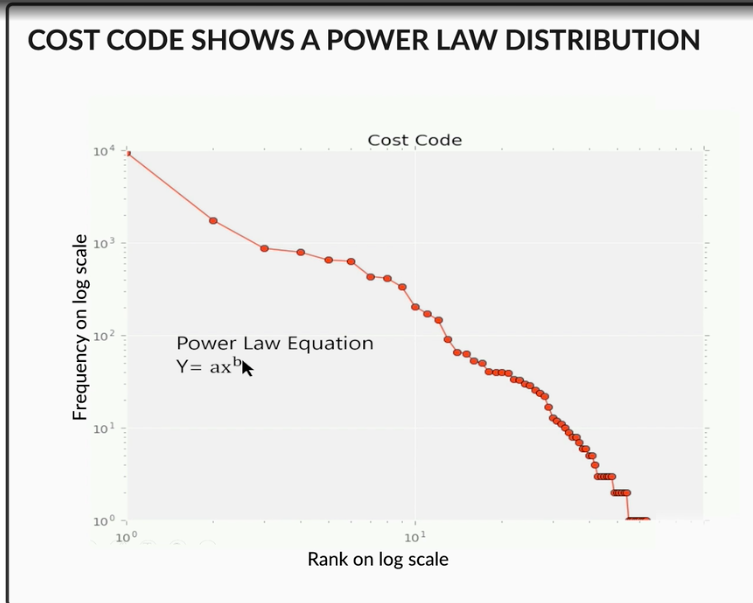

#### Why plotting on a log-log scale helps 

The objective of using a log scale is to make the plot readable by changing the scale. For example, the first ranked item had a frequency of 29000, the second ranked had 3500, the seventh had 700 and most others had very low frequencies such as 100, 80, 21 etc.  The range of frequencies is too large to fit on the plot.

It is important to note that rank-frequency plots enable you to extract meaning even from seemingly trivial unordered categorical variables such as country, name of an artist, name of a github user etc.

- It is possible to extract meaningful insights from unordered categorical variables using rank-frequency plots
- Rank-frequency plots of unordered categorical variables, when plotted on a log-log scale, typically result in a power law distribution

### Ordered Categorical Variables ( Ordered Dimensions)

Ex: Rating, Runs/Goals Scored

In [70]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df=pd.read_csv('tendulkar_ODI.csv')
df.shape

(295, 13)

In [53]:
df["Runs"].value_counts()
df=df[~(df["Runs"].isin(['TDNB','DNB']))]

In [54]:
df["Runs"]=df["Runs"].apply(lambda x:int(x.replace("*","")))

<AxesSubplot:xlabel='4s', ylabel='Runs'>

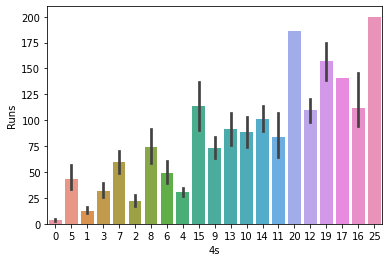

In [55]:
sns.barplot(data=df,x="4s",y="Runs")

(array([85., 62., 42., 27., 21., 23., 14.,  5.,  7.,  6.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

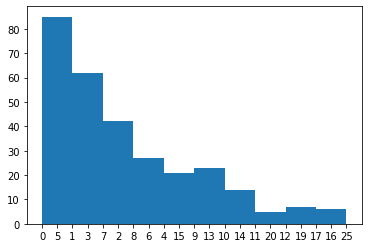

In [56]:
plt.hist(df["4s"])

### Quantitative Variables - Univariate Analysis

### Quantitative Variables - Summary Metrics

In [126]:
df=pd.read_csv('popularity.csv')

In [127]:
df.shape

(39644, 61)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [129]:
df.columns = df.columns.str.strip()

In [132]:
df["shares"].describe(percentiles=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,1],include=[int,float])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
10%         708.000000
20%         870.600000
25%         946.000000
30%        1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
75%        2800.000000
80%        3400.000000
90%        6200.000000
95%       10800.000000
100%     843300.000000
max      843300.000000
Name: shares, dtype: float64

In [186]:
np.quantile(df["shares"],0.80)

3400.0

In [189]:
np.percentile(df["shares"],80)

3400.0

In [133]:
df["shares"].quantile(.80)

3400.0

In [190]:
df.quantile(.78,axis=0)

timedelta                           567.000000
n_tokens_title                       12.000000
n_tokens_content                    771.000000
n_unique_tokens                       0.619048
n_non_stop_words                      1.000000
n_non_stop_unique_tokens              0.764331
num_hrefs                            15.000000
num_self_hrefs                        4.000000
num_imgs                              6.000000
num_videos                            1.000000
average_token_length                  4.883594
num_keywords                          9.000000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                            4.000000
kw_max_min                         1100.000000
kw_avg_min                          375.714286
kw_min_max   

In [191]:
mean = np.mean(df["shares"], axis=0)
sd = np.std(df ["shares"], axis=0)
print(mean, sd)

3395.3801836343455 11626.804105728816


In [192]:
low = 0
high = .95
quant_df = df.quantile([low, high])
print(quant_df)

      timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0.00        8.0             2.0               0.0         0.000000   
0.95      697.0            14.0            1407.0         0.720908   

      n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0.00               0.0                  0.000000        0.0             0.0   
0.95               1.0                  0.857143       30.0             9.0   

      num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0.00       0.0         0.0  ...                    0.0                    0.0   
0.95      20.0         6.0  ...                    0.2                    1.0   

      avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0.00                   -1.0                   -1.0                   -1.0   
0.95                    0.0                    0.0                    0.0   

      title_subjectivity  title_sentiment_polarity  abs_title_subjectivity 

In [194]:
P = np.percentile(df["shares"], [0, 95])
new_df = df[(df["shares"] >= P[0]) & (df["shares"] <= P[1])]

In [167]:
new_df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_78%
0,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,593.0
1,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,711.0
2,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,505.0


In [195]:
new_df["shares"].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name: shares, dtype: float64

In [196]:
df["shares"].count()

39644

In [198]:
(1- new_df["shares"].count()/df["shares"].count())*100

4.996973060236098

### Segmented Univariate Analysis

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("EDA_nas.csv")
df.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [248]:
df2=pd.pivot_table(data=df,index="Mother.edu",columns="Siblings",values="STUID",aggfunc="count")

In [249]:
df2

Siblings,1 sibling,2 siblings,3 siblings,4+ siblings,Single child
Mother.edu,,,,,
Degree & above,88,36,11,6,20
Illiterate,533,923,532,469,88
Primary,689,771,417,251,92
Secondary,1050,846,348,255,92
Sr secondary,206,132,48,23,24


<AxesSubplot:ylabel='Father.edu'>

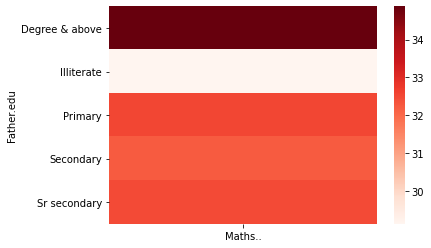

In [23]:
sns.heatmap(data=df2,cmap="Reds")

In [24]:
df2.head()

,Maths..
Father.edu,
Degree & above,34.879193
Illiterate,29.126754
Primary,32.561137
Secondary,32.230393
Sr secondary,32.493415


<AxesSubplot:ylabel='Play.games'>

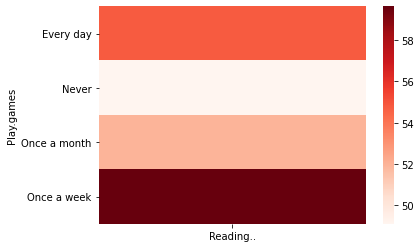

In [25]:
#What is the impact of 'Play.Games' on Reading marks?
df2=pd.pivot_table(data=df,index="Play.games",values="Reading..",aggfunc="mean")
sns.heatmap(data=df2,cmap="Reds")

In [26]:
df2

,Reading..
Play.games,
Every day,54.780136
Never,49.107484
Once a month,51.951193
Once a week,59.627034


In [30]:
df2=pd.pivot_table(data=df,index="Mother.edu",values="Reading..",aggfunc=(lambda x:np.quantile(x,0.25)))
df2

""
Mother.edu


#### EDA Census- Graded Question

In [34]:
df=pd.read_csv("EDA_census.xlsx")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 3


#### Graded Question

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("EDA_Edu.csv")
df.columns = df.columns.str.strip()
df["AreaName"]=df["AreaName"].apply(lambda x:x.replace("State - ","").strip())
df.columns

Index(['TableName', 'StateCode', 'DisttCode', 'AreaName', 'PopulationCat',
       'AgeGroup', 'TotalPersons', 'TotalMales', 'TotalFemales',
       'IlliteratePersons', 'IlliterateMales', 'IlliterateFemales',
       'LiteratePersons', 'LiterateMales', 'LiterateFemales',
       'LitWoEduPersons', 'LitWoEduMales', 'LitWoEduFemales',
       'BelowPrimaryPersons', 'BelowPrimaryMales', 'BelowPrimaryFemales',
       'PrimaryPersons', 'PrimaryMales', 'PrimaryFemales', 'MiddlePersons',
       'MiddleMales', 'MiddleFemales', 'SecondaryPersons', 'SecondaryMales',
       'SecondaryFemales', 'HigherSecondaryPersons', 'HigherSecondaryMales',
       'HigherSecondaryFemales', 'NonTechnicalDiplomaPersons',
       'NonTechnicalDiplomaMales', 'NonTechnicalDiplomaFemales',
       'TechnicalDiplomaPersons', 'TechnicalDiplomaMales',
       'TechnicalDiplomaFemales', 'GraduatePersons', 'GraduateMales',
       'GraduateFemales', 'UnclassifiedPersons', 'UnclassifiedMales',
       'UnclassifiedFemales'],
      

In [76]:
df_ind=df[df["AreaName"]=="INDIA"]

In [77]:
df.shape

(3132, 45)

In [78]:
df_ind.head(5)

,TableName,StateCode,DisttCode,AreaName,PopulationCat,AgeGroup,TotalPersons,TotalMales,TotalFemales,IlliteratePersons,...,NonTechnicalDiplomaFemales,TechnicalDiplomaPersons,TechnicalDiplomaMales,TechnicalDiplomaFemales,GraduatePersons,GraduateMales,GraduateFemales,UnclassifiedPersons,UnclassifiedMales,UnclassifiedFemales
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,0,136465,75715,60750
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,0,96524,52561,43963
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,0,70452,38456,31996


In [79]:
df_ind["Illiterate_Women_%"]=(df_ind["IlliterateFemales"]/df_ind["TotalFemales"])*100

<ipython-input-79-6712df10df42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind["Illiterate_Women_%"]=(df_ind["IlliterateFemales"]/df_ind["TotalFemales"])*100


In [81]:
df_ind[(df_ind["AgeGroup"]=='20-24')]

,TableName,StateCode,DisttCode,AreaName,PopulationCat,AgeGroup,TotalPersons,TotalMales,TotalFemales,IlliteratePersons,...,TechnicalDiplomaPersons,TechnicalDiplomaMales,TechnicalDiplomaFemales,GraduatePersons,GraduateMales,GraduateFemales,UnclassifiedPersons,UnclassifiedMales,UnclassifiedFemales,Illiterate_Women_%
15,C2308,0,0,INDIA,Total,20-24,111424222,57584693,53839529,18679492,...,1888379,1322758,565621,13170028,7029489,6140539,283366,156685,126681,22.683085
44,C2308,0,0,INDIA,Rural,20-24,73835046,38138662,35696384,15077525,...,1008048,722515,285533,5470150,3243921,2226229,183544,103023,80521,28.332923
73,C2308,0,0,INDIA,Urban,20-24,37589176,19446031,18143145,3601967,...,880331,600243,280088,7699878,3785568,3914310,99822,53662,46160,11.567107


In [82]:
df_tot_lit=df_ind[(df_ind["PopulationCat"]=='Total')][['TableName', 'StateCode', 'DisttCode', 'AreaName', 'PopulationCat',
       'AgeGroup', 'TotalPersons','LiteratePersons']]

In [83]:
df_tot_lit['lit%']=(df_tot_lit["LiteratePersons"]/df_tot_lit["TotalPersons"])*100

In [84]:
df_tot_lit

,TableName,StateCode,DisttCode,AreaName,PopulationCat,AgeGroup,TotalPersons,LiteratePersons,lit%
0,C2308,0,0,INDIA,Total,All ages,1210854977,763638812,63.066084
1,C2308,0,0,INDIA,Total,0-6,164515253,0,0.000000
2,C2308,0,0,INDIA,Total,7,24826640,18078426,72.818658
3,C2308,0,0,INDIA,Total,8,26968373,22836959,84.680522
4,C2308,0,0,INDIA,Total,9,23424638,20932734,89.362038
5,C2308,0,0,INDIA,Total,10,30552107,27097602,88.693071
6,C2308,0,0,INDIA,Total,11,24740946,22752473,91.962826
7,C2308,0,0,INDIA,Total,12,27877307,25485778,91.421234
8,C2308,0,0,INDIA,Total,13,24280683,22470207,92.543554
9,C2308,0,0,INDIA,Total,14,25258169,23157384,91.682750


In [105]:
df_lit_females=df[((df["AreaName"].isin(["MADHYA PRADESH","KERALA","GOA","RAJASTHAN"])) & (df["PopulationCat"]=='Total') & (df["AgeGroup"]=='All ages'))][['AreaName', 'PopulationCat',
       'AgeGroup', 'TotalFemales','LiterateFemales']]

In [107]:
df_lit_females["Female_Lit_%"]=(df_lit_females["LiterateFemales"]/df_lit_females["TotalFemales"])*100

In [108]:
df_lit_females

,AreaName,PopulationCat,AgeGroup,TotalFemales,LiterateFemales,Female_Lit_%
696,RAJASTHAN,Total,All ages,32997440,14586870,44.206066
2001,MADHYA PRADESH,Total,All ages,35014503,17676841,50.484341
2610,GOA,Total,All ages,719405,549664,76.405363
2784,KERALA,Total,All ages,17378649,14430921,83.038221


In [115]:
df_lit_all=df[((df["PopulationCat"]=='Total') & (df["AgeGroup"]=='All ages'))][["AreaName","TotalPersons","IlliteratePersons","LiteratePersons"]]

In [116]:
df_lit_all["Lit_%"]=(df_lit_all["LiteratePersons"]/df_lit_all["TotalPersons"])*100

In [120]:
df_lit_all.sort_values(by="Lit_%")

,AreaName,TotalPersons,IlliteratePersons,LiteratePersons,Lit_%
870,BIHAR,104099452,51594899,52504553,50.436916
1044,ARUNACHAL PRADESH,1383727,617722,766005,55.358102
1740,JHARKHAND,32988134,14660065,18328069,55.559581
696,RAJASTHAN,68548437,30273155,38275282,55.836841
87,JAMMU & KASHMIR,12541302,5474069,7067233,56.351669
783,UTTAR PRADESH,199812341,85414786,114397555,57.252497
2001,MADHYA PRADESH,72626809,29775640,42851169,59.001861
2436,ANDHRA PRADESH,84580777,34024017,50556760,59.773345
1479,MEGHALAYA,2966889,1181884,1785005,60.164199
1914,CHHATTISGARH,25545198,10165276,15379922,60.206705


#### Bivariate Analysis on Continuous Variables

Continous Variables - like quantative values which can be added or any calculation can be performed
Categorical Variables - like dimension values which can be grouped or have less distinct values
But they are not mutually exclusive like age which can be grouped as well as be taken avg

<b>Correlation</b> is a number between -1 and 1 which quantifies the extent to which two variables ‘correlate’ with each other.

If one increases as the other increases, the correlation is positive

If one decreases as the other increases, the correlation is negative

If one stays constant as the other varies, the correlation is zero

In [232]:
df=pd.read_csv("EDA_Gold_Silver_prices.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        241 non-null    object 
 1   SilverPrice  241 non-null    float64
 2   GoldPrice    241 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [233]:
round(df.corr(method ='pearson'),2)

,SilverPrice,GoldPrice
SilverPrice,1.00,0.95
GoldPrice,0.95,1.00


In [160]:
df["year"]=df["Month"].apply(lambda x:'20' + (x.split('-')[1]))

In [191]:
round(df[df.year=='2000'].corr(method='pearson'),2)

,SilverPrice,GoldPrice
SilverPrice,1.00,0.46
GoldPrice,0.46,1.00


In [198]:
df=pd.read_csv("currencies.csv")
df.set_index('Currency').head()
df.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [194]:
df1=round(df.corr(method='pearson'),2)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1,figsize=(16,12),alpha=0.3)

In [208]:
df1["Euro"].sort_values(ascending=False)

Euro                          1.00
Danish Krone                  1.00
Czech Koruna                  0.95
Norwegian Krone               0.85
Swedish Krona                 0.76
Israeli New Sheqel            0.64
Canadian Dollar               0.64
Polish Zloty                  0.61
U.K. Pound Sterling           0.53
Hungarian Forint              0.50
Botswana Pula                 0.47
Malaysian Ringgit             0.46
Icelandic Krona               0.41
Mexican Peso                  0.41
Brazilian Real                0.38
South African Rand            0.38
Thai Baht                     0.37
Russian Ruble                 0.35
Australian Dollar             0.33
Swiss Franc                   0.28
Algerian Dinar                0.26
Tunisian Dinar                0.26
Nepalese Rupee                0.25
Chilean Peso                  0.24
Indian Rupee                  0.24
New Zealand Dollar            0.17
Chinese Yuan                  0.15
Brunei Dollar                 0.10
Singapore Dollar    

In <b>Univariate analysis</b>, we are analysing one column to see the pattern.
In <b>segmented univariate</b>, how its one vs another column.
In <b>bivariate analsysis</b>, how is one column impacting another column.

In [251]:
df=pd.read_csv("nas.csv")

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUID                   8801 non-null   int64  
 1   State                   8801 non-null   object 
 2   District                8801 non-null   int64  
 3   Gender                  8799 non-null   object 
 4   Age                     8569 non-null   object 
 5   Category                8232 non-null   float64
 6   Same.language           8572 non-null   float64
 7   Siblings                8801 non-null   object 
 8   Handicap                8304 non-null   object 
 9   Father.edu              8147 non-null   object 
 10  Mother.edu              7950 non-null   object 
 11  Father.occupation       7761 non-null   object 
 12  Mother.occupation       6626 non-null   object 
 13  Below.poverty           7347 non-null   object 
 14  Use.calculator          6646 non-null   

In [211]:
df.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [231]:
df[["Mother.edu","Siblings"]].dtypes
df["Mother.edu"]=df["Mother.edu"].astype("string")
df["Siblings"].value_counts()

2 siblings      2979
1 sibling       2726
3 siblings      1526
4+ siblings     1167
Single child     403
Name: Siblings, dtype: int64

In [283]:
pd.pivot_table(data=df,index="Mother.edu",columns="Siblings",values="STUID",aggfunc="count")

Siblings,1 sibling,2 siblings,3 siblings,4+ siblings,Single child
Mother.edu,,,,,
Degree & above,88,36,11,6,20
Illiterate,533,923,532,469,88
Primary,689,771,417,251,92
Secondary,1050,846,348,255,92
Sr secondary,206,132,48,23,24


In [273]:
df["Age"].value_counts()

14 years     4349
13 years     2798
15 years      844
12 years      298
16+ years     264
11- years      16
Name: Age, dtype: Int64

In [278]:
df2=df[~(df["Age"].isin(["11- years"]))]

In [280]:
df2.Age.value_counts()

14 years     4349
13 years     2798
15 years      844
12 years      298
16+ years     264
Name: Age, dtype: Int64

In [281]:
pd.pivot_table(data=df2,index="Father.edu",columns="Age",values="Science..",aggfunc="mean")

Age,12 years,13 years,14 years,15 years,16+ years
Father.edu,,,,,
Degree & above,46.752857,44.805143,42.676944,29.090000,32.730000
Illiterate,29.870000,33.758968,35.319478,33.413333,33.116786
Primary,34.121667,37.617555,36.700267,35.162768,32.364000
Secondary,33.593810,38.164402,36.738859,32.872800,30.960000
Sr secondary,40.113750,39.046503,39.050278,38.615714,31.513333


In [282]:
df2["Science.."].mean()

36.317140439932324

### Derived Metrics
Broadly, there are three different types of derived metrics:

1.    Type-driven metrics

2.    Business-driven metrics

3.    Data-driven metrics

 

<b>Type-Driven Metrics</b>

 

These metrics can be derived by understanding the variable’s typology. You have already learnt one simple way of classifying variables/attributes — <b>categorical (ordered, unordered) and quantitative or numeric </b>. Similarly, there are various other ways of classification, one of which is Steven's typology.

 

<b>Steven’s typology classifies variables into four types — nominal, ordinal, interval and ratio:</b>

<b>Nominal variables(similar to unordered categorical variables):</b> Categorical variables, where the categories differ only by their names; there is no order among categories, e.g. colour (red, blue, green), gender (male, female), department (HR, analytics, sales)

These are the most basic form of categorical variables

<b>Ordinal variables(similar to ordered categorial variables):</b> Categories follow a certain order, but the mathematical difference between categories is not meaningful, e.g. education level (primary school, high school, college), height (high, medium, low), performance (bad, good, excellent), etc.

Ordinal variables are nominal as well

<b>Interval variables(similar to quantative variables):</b> Categories follow a certain order, and the mathematical difference between categories is meaningful but division or multiplication is not, e.g. temperature in degrees celsius ( the difference between 40 and 30 degrees C is meaningful, but 30 degrees x 40 degrees is not), dates (the difference between two dates is the number of days between them, but 25th May / 5th June is meaningless), etc.

Interval variables are both nominal and ordinal

<b>Ratio variables(similar to quantative variables):</b> Apart from the mathematical difference, the ratio (division/multiplication) is possible, e.g. sales in dollars ($100 is twice $50), marks of students (50 is half of 100), etc.

Ratio variables are nominal, ordinal and interval type

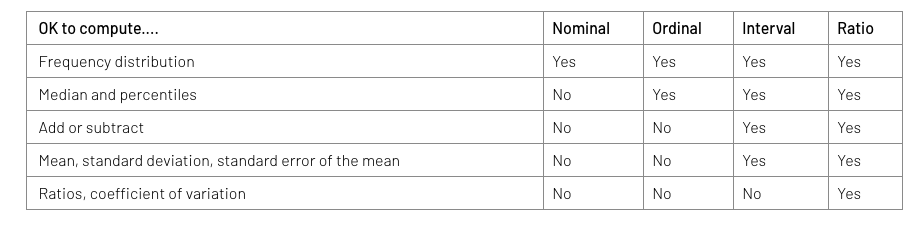

In [316]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/ILc-P4llUraMaYN6N6Bdw7p6kUvHnj')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1254 non-null   object
 1   placeID         1254 non-null   int64 
 2   rating          1254 non-null   int64 
 3   food_rating     1254 non-null   int64 
 4   service_rating  1254 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 49.1+ KB


In [292]:
round(df[["rating","food_rating","service_rating"]].mean(axis=1)).head(10)

0    2.0
1    2.0
2    2.0
3    2.0
4    1.0
5    0.0
6    1.0
7    0.0
8    1.0
9    2.0
dtype: float64

In [317]:
df=pd.read_csv("odi-batting.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50284 entries, 0 to 50283
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    50284 non-null  object
 1   Player     50284 non-null  object
 2   Runs       50284 non-null  int64 
 3   MatchDate  50284 non-null  object
 4   Weekday    50284 non-null  object
 5   Ground     50284 non-null  object
 6   Versus     50284 non-null  object
 7   Balls      50284 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [295]:
df.head(5)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57


In [318]:
df["Century"]=df["Runs"].apply(lambda x: (1 if x>=100 else 0))

In [319]:
df2=pd.pivot_table(data=df,index="Player",values="Century",aggfunc=sum)

In [320]:
df2.sort_values(by="Century",ascending=False)

,Century
Player,
Sachin R Tendulkar,48
Ricky T Ponting,30
Sanath T Jayasuriya,28
Sourav C Ganguly,22
Herschelle H Gibbs,21
...,...
Hasan Raza,0
Hasan Jamil,0
Hasan Durham,0


In [321]:
df["SR"]=(df["Runs"]/df["Balls"])*100

In [329]:
df2=df[df.Century>0]

In [330]:
df3=pd.pivot_table(data=df2,index="Player",values="SR",aggfunc=max)

In [331]:
df3.sort_values(by="SR",ascending=False)

,SR
Player,
Shahid Afridi,255.000000
Mark V Boucher,216.176471
Sanath T Jayasuriya,206.153846
Shane R Watson,192.708333
Brian C Lara,188.709677
...,...
Bruce A Edgar,72.340426
Stuart C Williams,70.469799
Douglas A Marillier,68.027211


In [333]:
df2["Year"]=df["MatchDate"].apply(lambda x: x.split("-")[2])

<ipython-input-333-dac2b17c36d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"]=df["MatchDate"].apply(lambda x: x.split("-")[2])


In [334]:
df2

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,Century,SR,Year
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,1,97.520661,2010
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,1,99.099099,2009
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,1,138.888889,2010
62,Afghanistan,Noor Ali Zadran,114,16-02-2010,Tue,Sharjah CA Stadium,Canada,127,1,89.763780,2010
87,Afghanistan,Karim Sadiq,114,16-08-2010,Mon,Cambusdoon New Ground,Scotland,108,1,105.555556,2010
...,...,...,...,...,...,...,...,...,...,...,...
48682,Zimbabwe,David L Houghton,142,10-10-1987,Sat,Lal Bahadur Shastri Stadium,New Zealand,137,1,103.649635,1987
48737,Zimbabwe,Dion D Ebrahim,121,25-11-2001,Sun,Bangabandhu National Stadium,Bangladesh,140,1,86.428571,2001
49101,Zimbabwe,Charles K Coventry,194,16-08-2009,Sun,Queens Sports Club,Bangladesh,156,1,124.358974,2009
49208,Zimbabwe,Sean M Ervine,100,24-01-2004,Sat,Adelaide Oval,India,100,1,100.000000,2004


In [336]:
df3=df2[df2.Country=="India"]

In [339]:
pd.pivot_table(data=df3,index="Year",values="Century",aggfunc=sum).sort_values(by="Century",ascending=False)

,Century
Year,
1998,18
1999,15
2009,13
2010,12
2005,11
2008,10
2003,10
2000,10
2002,9


In [353]:
import pandas as pd
order = pd.read_csv('https://query.data.world/s/3hIAtsCE7vYkPEL-O5DyWJAeS5Af-7')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

In [354]:
order

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,2010-10-13,LOW,Ord_1
1,293,2012-01-10,HIGH,Ord_2
2,483,2011-10-07,HIGH,Ord_3
3,515,2010-08-28,NOT SPECIFIED,Ord_4
4,613,2011-06-17,HIGH,Ord_5
...,...,...,...,...
5501,47360,2010-08-10,NOT SPECIFIED,Ord_5502
5502,52706,2012-09-07,LOW,Ord_5503
5503,54279,2011-07-30,HIGH,Ord_5504
5504,55558,2010-09-08,MEDIUM,Ord_5505


In [356]:
order['day'] = order['Order_Date'].dt.day

In [357]:
order

,Order_ID,Order_Date,Order_Priority,Ord_id,day
0,3,2010-10-13,LOW,Ord_1,13
1,293,2012-01-10,HIGH,Ord_2,10
2,483,2011-10-07,HIGH,Ord_3,7
3,515,2010-08-28,NOT SPECIFIED,Ord_4,28
4,613,2011-06-17,HIGH,Ord_5,17
...,...,...,...,...,...
5501,47360,2010-08-10,NOT SPECIFIED,Ord_5502,10
5502,52706,2012-09-07,LOW,Ord_5503,7
5503,54279,2011-07-30,HIGH,Ord_5504,30
5504,55558,2010-09-08,MEDIUM,Ord_5505,8


#### Data-driven metrics 

Data-driven metrics  can be created based on the variables present in the existing data set. For example, if you have two variables in your data set such as "weight" and "height" which shows a high correlation. So, instead of analysing "weight" and "height" variables separately, you can think of deriving a new metric "Body Mass Index (BMI)"

In [406]:
df=pd.read_csv('grades.csv')

In [407]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   submission   198 non-null    object
 1   submit_time  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49
...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06


In [408]:
df["compression"]=df["submission"].apply(lambda a:(a.split("/")[5]).split('.')[1])

In [409]:
100*(len(df[df.compression=="zip"].value_counts())/len(df.index))

95.45454545454545

In [412]:
df['submit_time'] = pd.to_datetime(df['submit_time'])
df['submit_date']=df['submit_time'].dt.strftime("%Y-%m-%d")

In [413]:
df["day"]=df['submit_time'].dt.day
df["mon"]=df['submit_time'].dt.month
df["year"]=df['submit_time'].dt.year
df["hr"]=df['submit_time'].dt.hour
df["min"]=df['submit_time'].dt.minute
df["sec"]=df['submit_time'].dt.second

In [414]:
df[df.submit_time > '2017-01-03 23:59:59']

,submission,submit_time,compression,submit_date,day,mon,year,hr,min,sec
5,https://ckd.upgrad.com/UpGrad/0ab308ab-2b3a-4c...,2017-01-04 02:43:46,zip,2017-01-04,4,1,2017,2,43,46
7,https://ckd.upgrad.com/UpGrad/d8969806-6760-44...,2017-01-09 23:49:09,zip,2017-01-09,9,1,2017,23,49,9
11,https://ckd.upgrad.com/UpGrad/873211b9-5a3q-45...,2017-01-09 23:41:23,zip,2017-01-09,9,1,2017,23,41,23
16,https://ckd.upgrad.com/UpGrad/f0c04fba-56d2-4a...,2017-01-04 01:43:43,zip,2017-01-04,4,1,2017,1,43,43
21,https://ckd.upgrad.com/UpGrad/7cbc35aa-1d5c-4d...,2017-01-09 23:59:21,zip,2017-01-09,9,1,2017,23,59,21
24,https://ckd.upgrad.com/UpGrad/a4d13ca3-9b40-40...,2017-01-04 00:04:08,zip,2017-01-04,4,1,2017,0,4,8
28,https://ckd.upgrad.com/UpGrad/3f50884a-4fd0-48...,2017-01-09 23:26:15,zip,2017-01-09,9,1,2017,23,26,15
29,https://ckd.upgrad.com/UpGrad/48781790-093d-42...,2017-01-04 00:03:26,zip,2017-01-04,4,1,2017,0,3,26
30,https://ckd.upgrad.com/UpGrad/cc4f866d-b532-40...,2017-01-04 00:01:00,zip,2017-01-04,4,1,2017,0,1,0
36,https://ckd.upgrad.com/UpGrad/9dcaaf78-bcbf-43...,2017-01-09 01:21:34,zip,2017-01-09,9,1,2017,1,21,34


<AxesSubplot:>

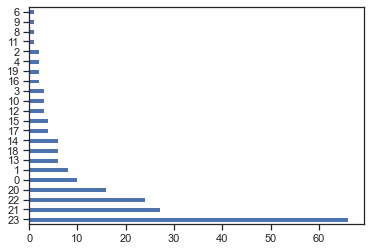

In [418]:
df["hr"].value_counts().plot.barh()